In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
events_data = pd.read_csv('event_data_train.csv')
submission_data = pd.read_csv('submissions_data_train.csv')

In [3]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's')
events_data['day'] = events_data.date.dt.date

submission_data['date'] = pd.to_datetime(submission_data.timestamp, unit = 's')
submission_data['day'] = submission_data.date.dt.date

In [4]:
users_data = events_data.groupby('user_id', as_index= False)\
        .agg({'timestamp': 'max'})\
        .rename({'timestamp':'last_timestamp'}, axis = 'columns')

In [5]:
now = 1526772811
drop_out_threasold = 2592000

In [6]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threasold

In [7]:
users_scores = submission_data.pivot_table(index='user_id',\
                        columns = 'submission_status',\
                        values = 'step_id',\
                        aggfunc = 'count',\
                        fill_value = 0)\
                        .reset_index()

In [8]:
users_data = users_data.merge(users_scores, on = 'user_id', how = 'outer')

In [9]:
users_data = users_data.fillna(0)

In [10]:
users_invent_data = events_data.pivot_table(index = 'user_id',
                        columns = 'action',
                        values  = 'step_id',
                        aggfunc = 'count',
                        fill_value = 0).reset_index()

In [11]:
users_data = users_data.merge(users_invent_data, how = 'outer')

In [12]:
users_days = events_data.groupby('user_id').day.nunique()

In [13]:
users_days.to_frame().reset_index()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
...,...,...
19229,26790,4
19230,26793,1
19231,26794,9
19232,26797,2


In [14]:
users_data = users_data.merge(users_days, on = 'user_id', how = 'outer')

In [15]:
users_data['passed_corse'] = users_data.passed > 170

In [16]:
users_data[users_data.passed_corse].day.median()

20.0

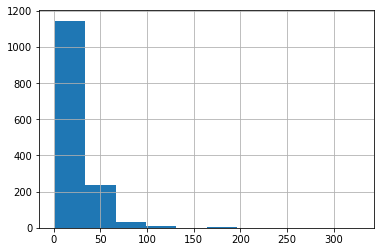

In [17]:
users_data[users_data.passed_corse].day.hist()

In [18]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [19]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [20]:
user_min_time = events_data.groupby('user_id', as_index=False)\
.agg({'timestamp':'min'}).rename({'timestamp': 'min_timestamp'}, axis = 1)

In [21]:
user_min_time.head()

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [22]:
users_data = users_data.merge(user_min_time, how = 'outer')

In [23]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [24]:
events_data_train = pd.DataFrame()

In [25]:
for user_id in users_data.user_id:
    min_user_time = users_data[users_data.user_id == user_id].min_timestamp.item()
    break

In [26]:
min_user_time

1472827464

In [27]:
user_id

1

In [28]:
for user_id in users_data.user_id:
    min_user_time = users_data[users_data.user_id == user_id].min_timestamp.item()
    time_treshold = min_user_time + 3*24*60*60
    user_events_data = events_data[(events_data.user_id == user_id) & (events_data.timestamp < time_treshold)]
    break

In [29]:
user_events_data

,step_id,timestamp,action,user_id,date,day
1347416,31981,1472827464,viewed,1,2016-09-02 14:44:24,2016-09-02
1347417,31981,1472827464,discovered,1,2016-09-02 14:44:24,2016-09-02


In [30]:
#for user_id in users_data.user_id:
    #min_user_time = users_data[users_data.user_id == user_id].min_timestamp.item()
    #time_treshold = min_user_time + 3*24*60*60
    #user_events_data = events_data[(events_data.user_id == user_id) & (events_data.timestamp < time_treshold)]
    #event_data_train = event_data_train.append(user_events_data)
    #break

In [31]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [32]:
events_data['user_time'] = events_data.user_id.map(str) + '-' + events_data.timestamp.map(str)

In [33]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632-1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632-1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632-1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632-1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632-1434340895


In [34]:
learning_time_treshold = 3 * 24 * 60 * 60
learning_time_treshold

259200

In [35]:
user_min_time.head()

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [36]:
user_learning_time_treshold = user_min_time.user_id.map(str) + '_' + \
(user_min_time.min_timestamp + learning_time_treshold).map(str)

In [37]:
user_learning_time_treshold.head()

0    1_1473086664
1    2_1514642564
2    3_1434617676
3    5_1466416009
4    7_1521893860
dtype: object

In [38]:
user_min_time['user_learning_time_treshold'] = user_learning_time_treshold

In [39]:
events_data = events_data.merge(user_min_time[['user_id', 'user_learning_time_treshold']],how='outer')

In [40]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_treshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632-1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632-1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632-1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632-1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632-1434340895,17632_1434600048


### events_data.shape

In [41]:
events_data_train = events_data[events_data.user_time <= events_data.user_learning_time_treshold]

In [42]:
#### 

In [43]:
events_data_train.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_treshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632-1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632-1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632-1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632-1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632-1434340895,17632_1434600048


In [44]:
events_data_train.groupby('user_id').day.nunique().max()

478

In [45]:
events_data.shape

(3480703, 8)

In [46]:
submission_data['user_time'] = submission_data.user_id.map(str) + '-' + submission_data.timestamp.map(str)

submission_data = submission_data.merge(user_min_time[['user_id', 'user_learning_time_treshold']], how='outer')

submissions_data_train = submission_data[submission_data.user_time <= submission_data.user_learning_time_treshold]

events_data_train.groupby('user_id').day.nunique().max()

478

In [52]:
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index().\
rename(columns={'day':'days'})

In [53]:
X.head()

,user_id,days
0,2,1
1,3,5
2,5,1
3,8,1
4,14,1


In [54]:
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index().\
rename(columns={'step_id':'steps_tried'})

In [55]:
X = X.merge(steps_tried)

In [56]:
X.shape

(9940, 3)

In [57]:
X

,user_id,days,steps_tried
0,2,1,2
1,3,5,29
2,5,1,2
3,8,1,11
4,14,1,1
...,...,...,...
9935,26787,1,3
9936,26790,1,1
9937,26794,4,29
9938,26797,1,2


In [61]:
X = X.merge(submissions_data_train.pivot_table(index = 'user_id',
                                  columns = 'submission_status',
                                  values = 'step_id',
                                  aggfunc = 'count',
                                  fill_value = 0).reset_index())

In [62]:
X.head()

,user_id,days,steps_tried,correct,wrong
0,2,1,2,2,0
1,3,5,29,29,23
2,5,1,2,2,2
3,8,1,11,9,21
4,14,1,1,0,1


In [64]:
X['correct_ratio'] = X.correct/ X.correct + X.wrong

In [65]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio
0,2,1,2,2,0,1.0
1,3,5,29,29,23,24.0
2,5,1,2,2,2,3.0
3,8,1,11,9,21,22.0
4,14,1,1,0,1,NaN


In [68]:
X = X.merge(events_data_train.pivot_table(index = 'user_id',
                                  columns = 'action',
                                  values = 'step_id',
                                  aggfunc = 'count',
                                  fill_value = 0).reset_index()[['user_id', 'viewed']], how='outer')

In [70]:
X.shape

(19234, 7)

In [74]:
X = X.fillna(0)

In [77]:
X = X.merge(users_data[['user_id','passed_corse','is_gone_user']], how='outer')

In [81]:
X = X[(X.passed_corse == False) & (X.is_gone_user == False)]

In [83]:
X[(X.passed_corse == False) & (X.is_gone_user == False)].head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_corse,is_gone_user
8,25,1.0,2.0,1.0,4.0,5.0,40,False,False
12,32,1.0,3.0,3.0,0.0,1.0,22,False,False
22,57,3.0,15.0,15.0,29.0,30.0,87,False,False
32,78,1.0,2.0,2.0,0.0,1.0,13,False,False
60,156,1.0,2.0,2.0,0.0,1.0,11,False,False


In [96]:
X = X[~((X.is_gone_user == False) & (X.passed_corse == False))]

In [98]:
X

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_corse,is_gone_user


In [101]:
X.groupby(['passed_corse', 'is_gone_user']).user_id.count()

Series([], Name: user_id, dtype: int64)